<a href="https://colab.research.google.com/github/yeijSong/dataAnalysis/blob/main/unit12_%EC%A7%80%ED%95%98%EC%B2%A0_%EC%8B%9C%EA%B0%84%EB%8C%80%EB%B3%84_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


지하철 시간대별 이용 현황 데이터 출력하기

In [ ]:
import csv

f=open('subwaytime.csv')
data=csv.reader(f)

for row in data:
  print(row)

헤더 제외하고 map함수를 활용한 데이터 타입 바꾸기(문자열->정수)

In [ ]:
import csv

f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

for row in data:
  row[4:]=map(int, row[4:])
  print(row)

**출근시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?**

아침 7시 승차 데이터 추출 -> 10번 인덱스 데이터 값 추출

In [ ]:
import csv

f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

result = [] # 아침 7시 승차 데이터 추출 -> row[10]

for row in data:
  row[4:]=map(int, row[4:])
  result.append(row[10])

print(len(result))
print(result)

598
[39110, 7703, 6733, 6066, 5143, 14893, 20077, 22615, 46015, 6088, 5822, 8459, 5822, 3225, 7973, 27835, 38199, 31012, 6313, 23263, 25458, 59821, 70814, 99368, 45639, 130638, 59461, 18787, 17974, 23502, 16391, 48487, 27365, 14946, 26301, 78413, 89675, 146181, 84974, 243083, 99608, 154641, 77272, 153133, 46364, 45277, 56578, 48068, 75744, 40444, 18646, 26197, 18343, 7965, 6917, 3353, 3160, 32301, 43628, 4860, 3988, 91650, 148741, 58325, 55607, 62354, 14773, 16297, 15231, 6464, 1992, 2337, 0, 5340, 25921, 27033, 24997, 17015, 13731, 16790, 28669, 8261, 27157, 36344, 15093, 8325, 25900, 3695, 25425, 21481, 38038, 22032, 23508, 26639, 49477, 101709, 59128, 108209, 141391, 127573, 54631, 92454, 88501, 52815, 33607, 17800, 5662, 7510, 10424, 5612, 6458, 12348, 18564, 5669, 11193, 13780, 4651, 49720, 78726, 3340, 6380, 12719, 21239, 19333, 31594, 42323, 9949, 24815, 39212, 15241, 47110, 44522, 37137, 89122, 28664, 89750, 19514, 28555, 71907, 42380, 77372, 43514, 16219, 48837, 9716, 9749, 21

아침 7시 승차 데이터 막대 그래프로 표현하기

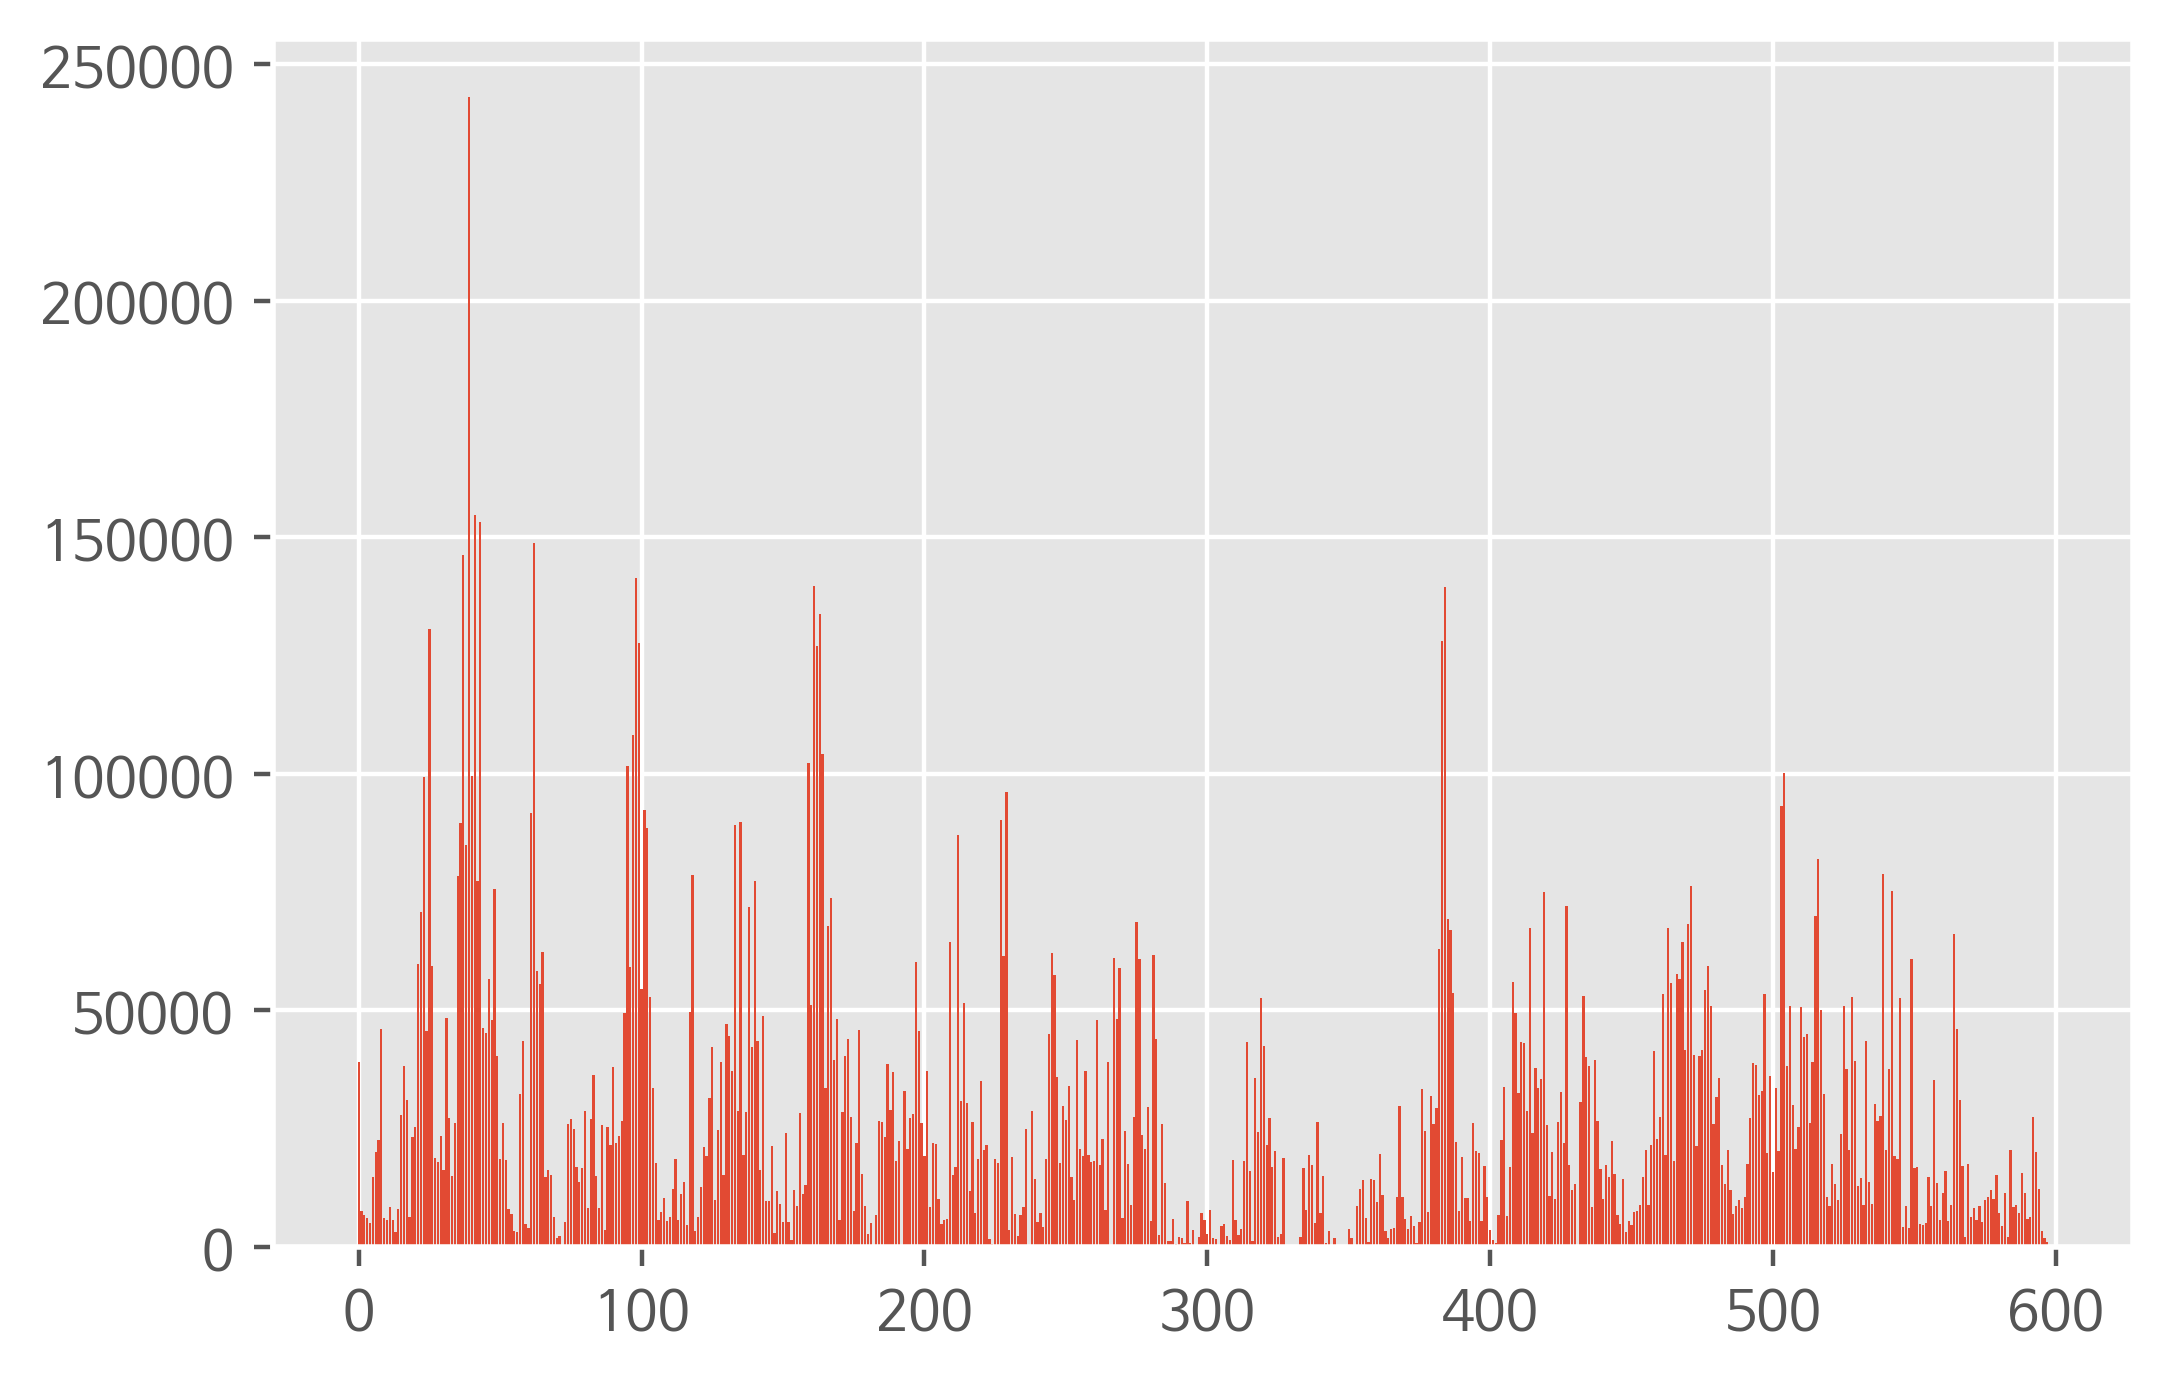

In [ ]:
import csv
import matplotlib.pyplot as plt


f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

result = [] # 아침 7시 승차 데이터 추출 -> row[10]

for row in data:
  row[4:]=map(int, row[4:])
  result.append(row[10])

# 데이터 시각화
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.bar(range(len(result)),result)
plt.show()


오름차순으로 데이터 정렬하여 그래프 그리기

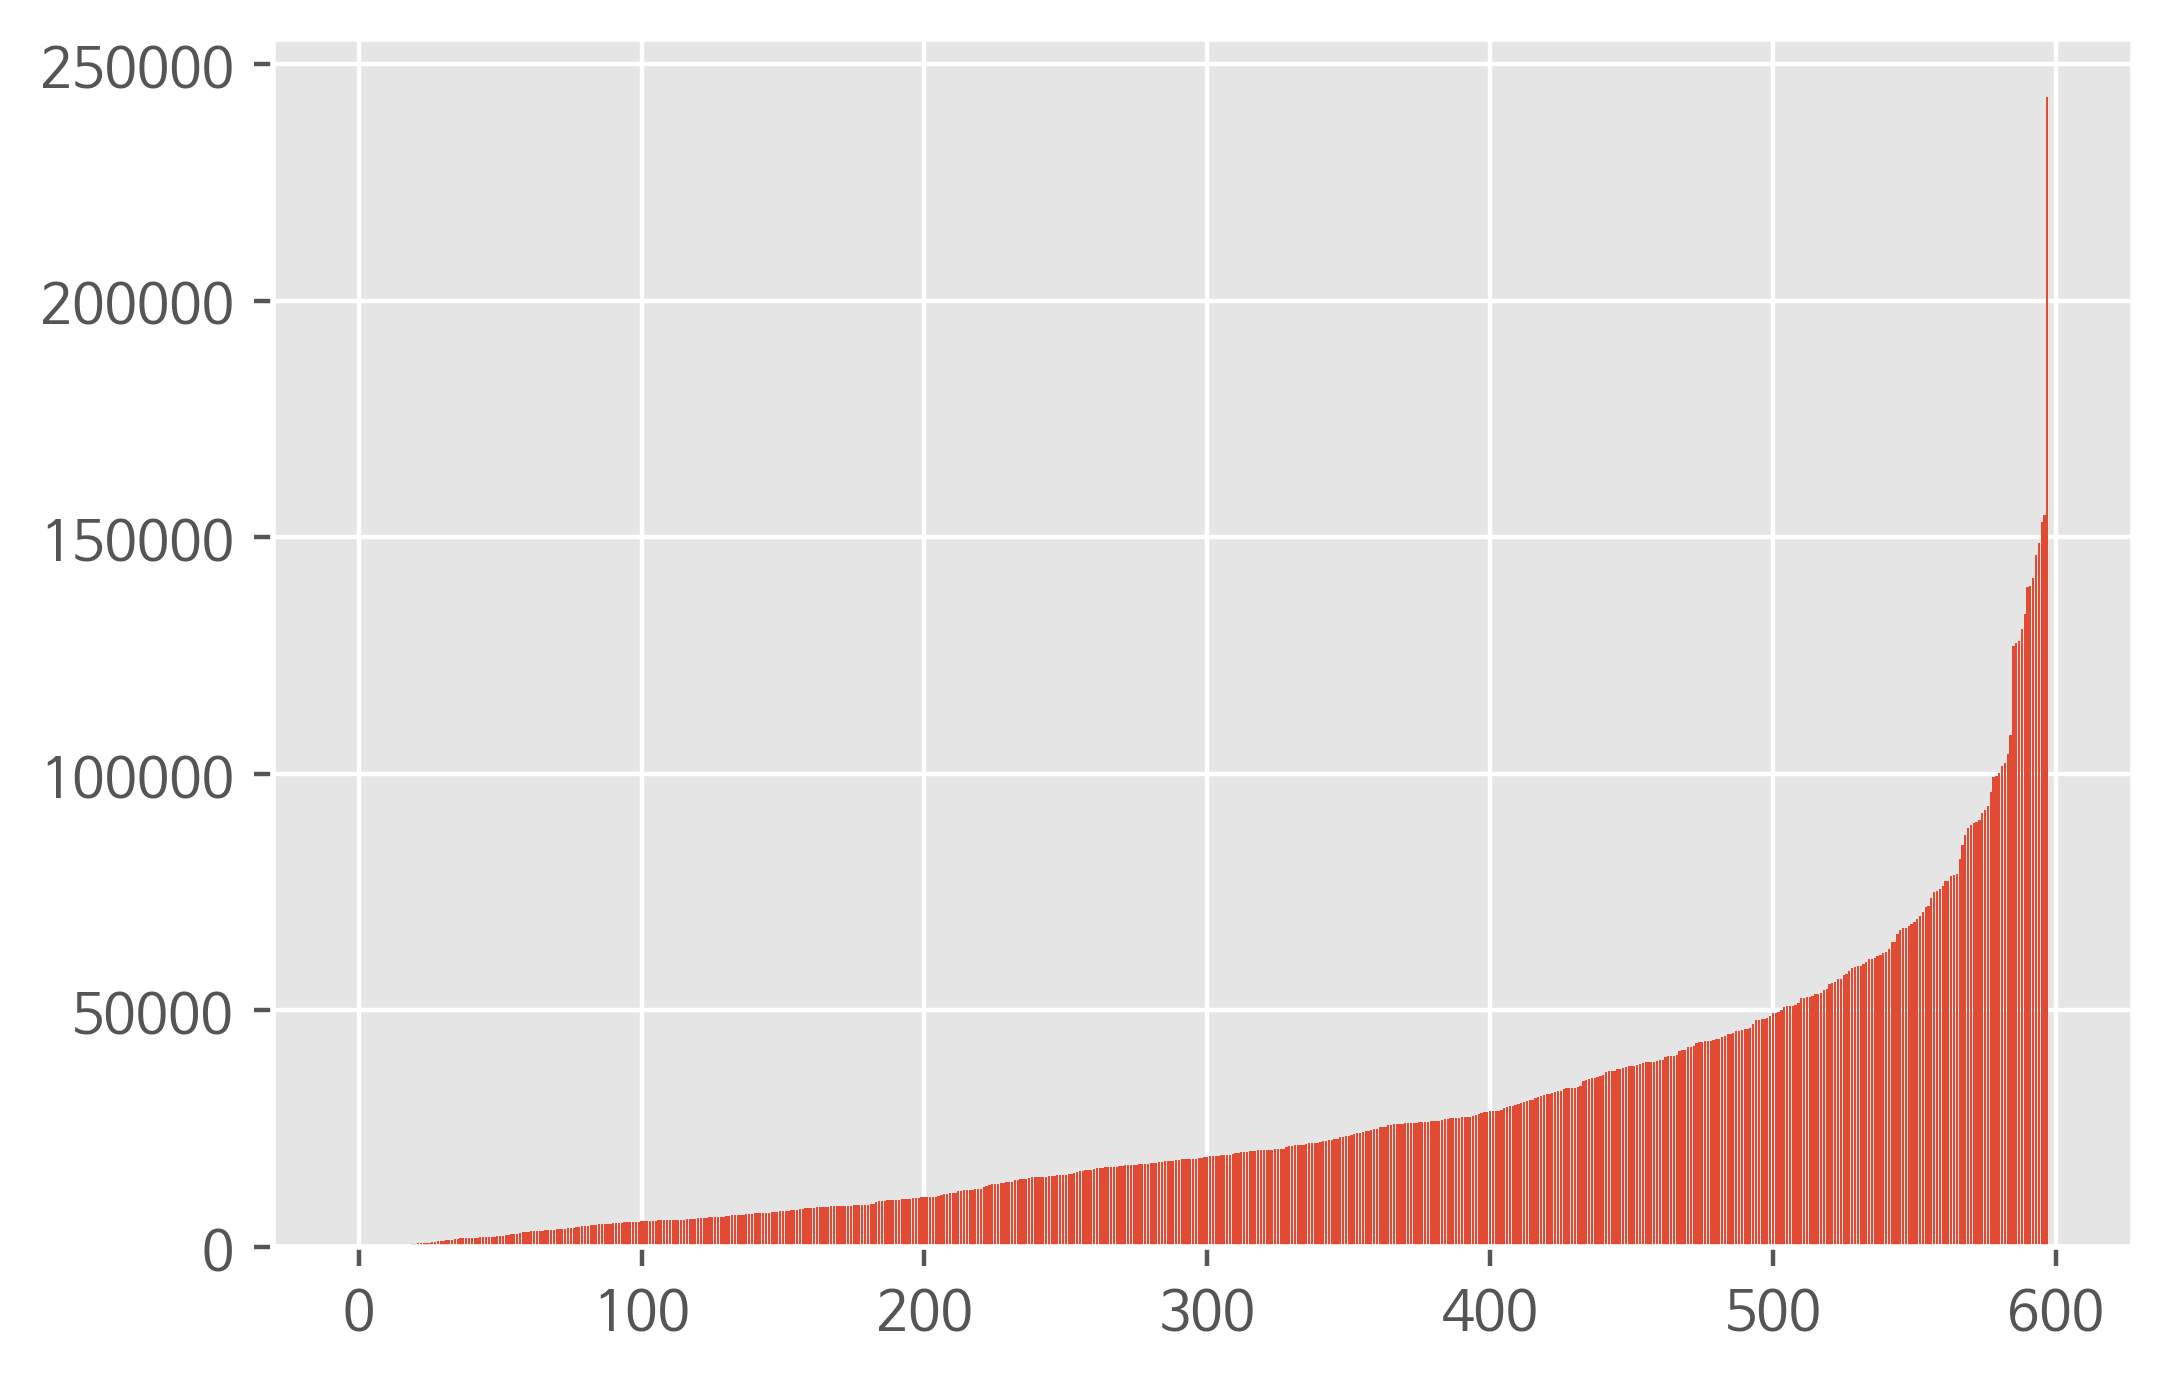

In [ ]:
import csv
import matplotlib.pyplot as plt


f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

result = [] # 아침 7시 승차 데이터 추출 -> row[10]

for row in data:
  row[4:]=map(int, row[4:])
  result.append(row[10])

result.sort() # 데이터를 오름차순으로 정리

# 데이터 시각화
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.bar(range(len(result)),result)
plt.show()


출근시간(7-9시)막대 그래프 그리기

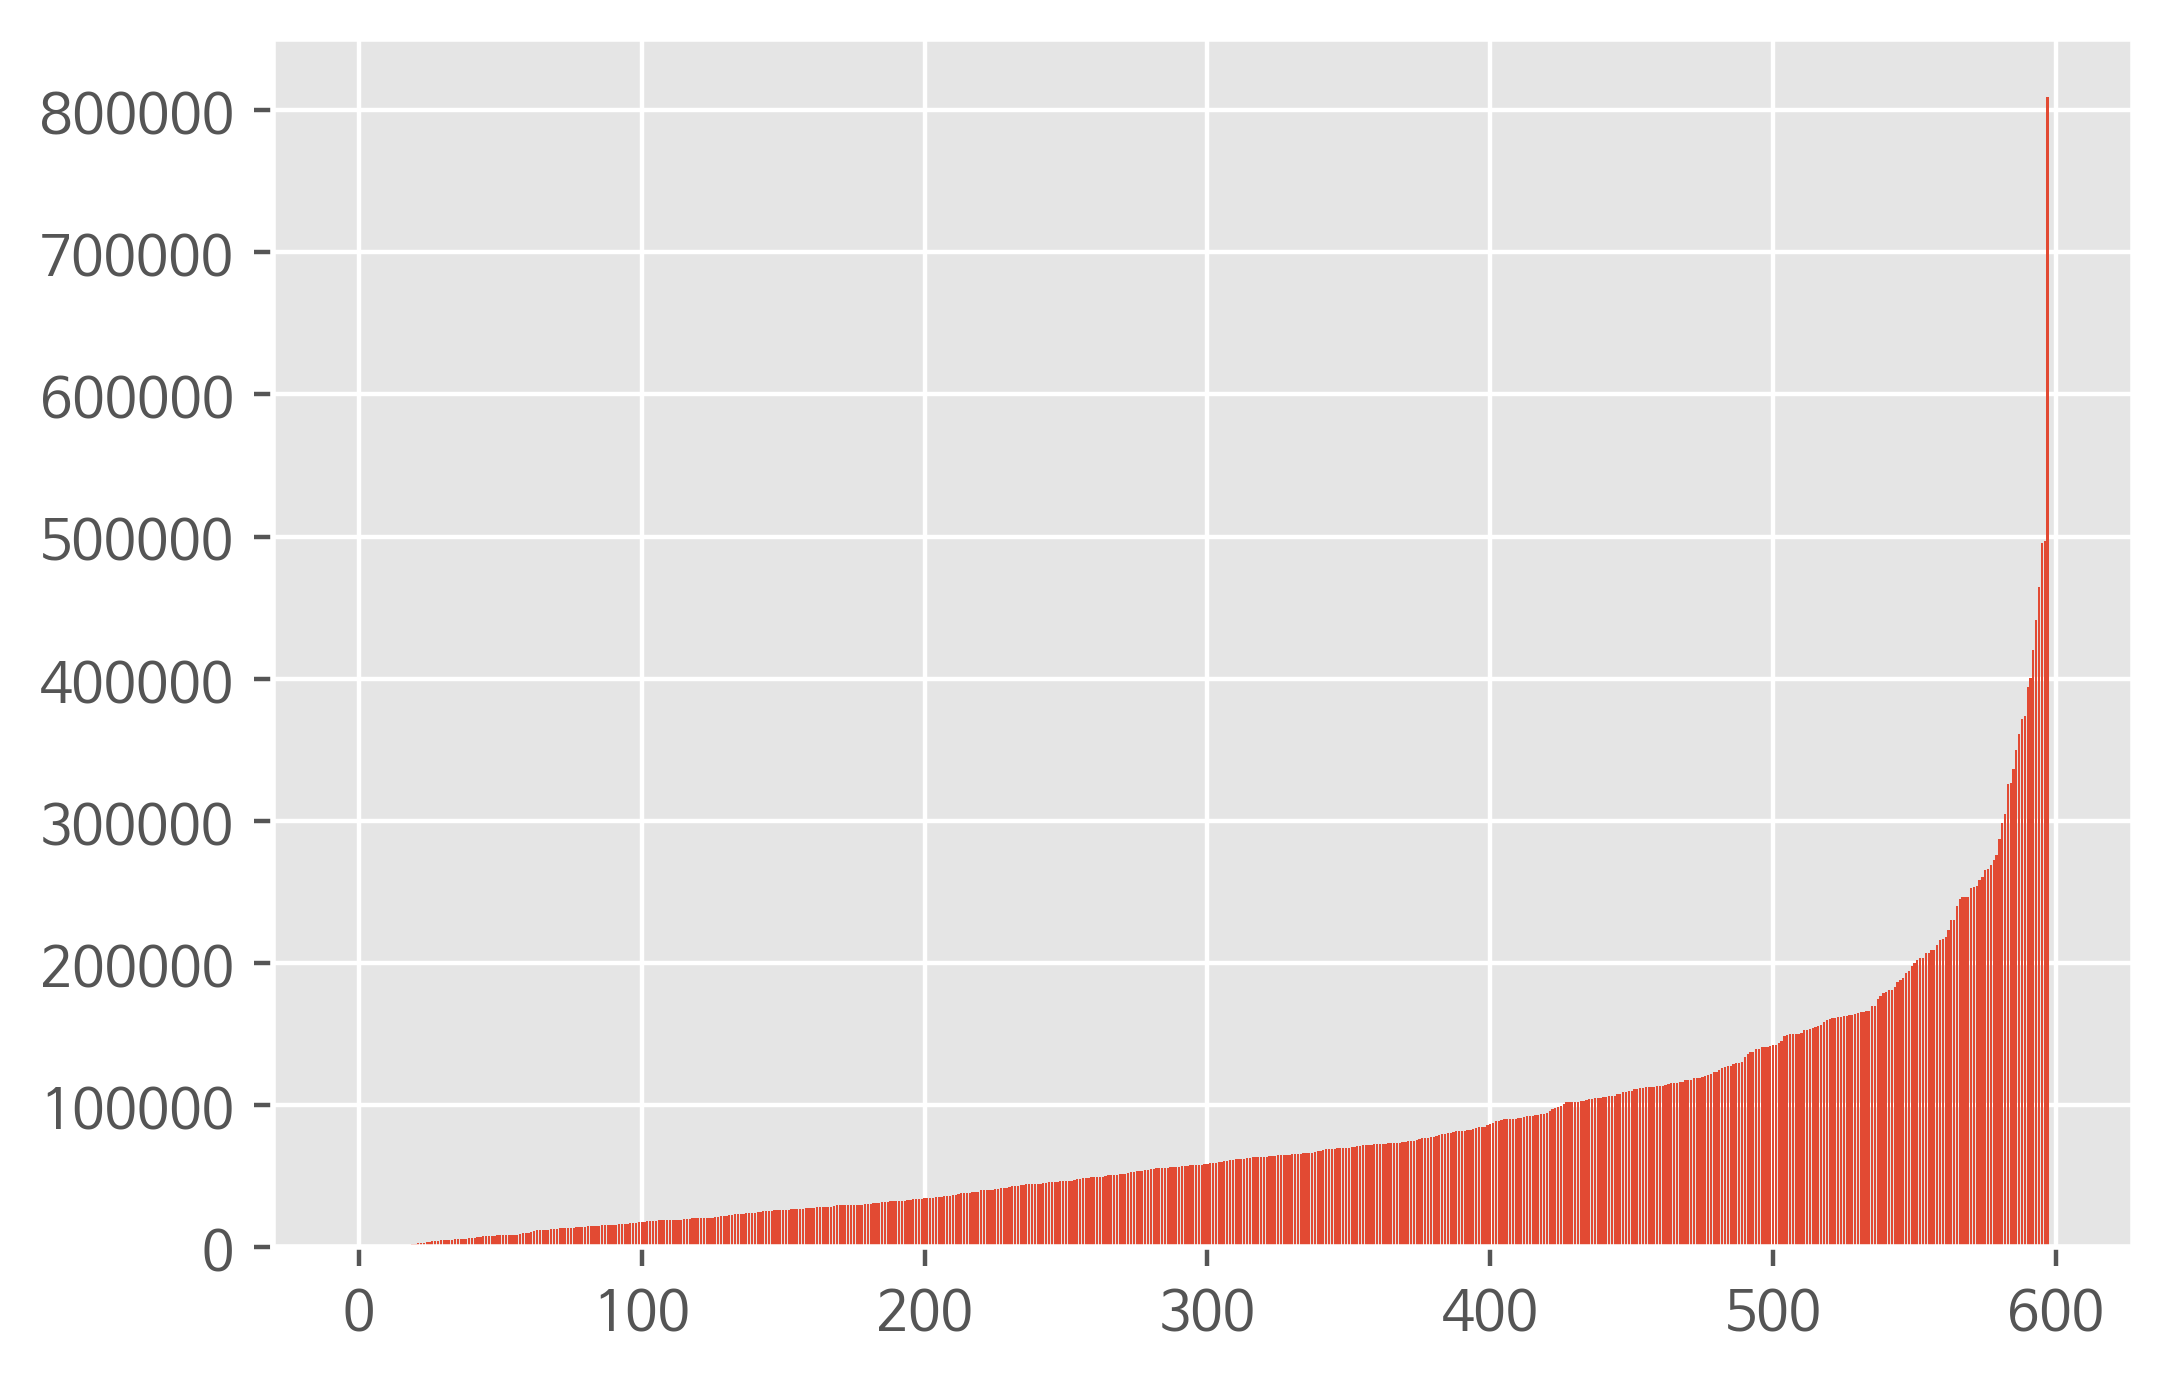

In [ ]:
import csv
import matplotlib.pyplot as plt


f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

result = [] # 출근시간인 아침 7~9시 승차 데이터 추출 -> row[10,12,14]

for row in data:
  row[4:]=map(int, row[4:])
  result.append(sum(row[10:15:2])) # 10,12,14를 추출

result.sort() # 데이터를 오름차순으로 정리

# 데이터 시각화
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.bar(range(len(result)),result)
plt.show()

출근시간(7-9시) 승차 인원의 합계의 최댓값 찾기

In [ ]:
import csv
import matplotlib.pyplot as plt


f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

max = 0
max_station = ''

for row in data:
  row[4:]=map(int, row[4:])
  if sum(row[10:15:2]) > max:
    max=sum(row[10:15:2])
    max_station = row[3] + row[1]

print(max_station, max)


신림2호선 809541


출근시간(7-9시) 하차 인원의 최대 역 찾기

In [ ]:
import csv
import matplotlib.pyplot as plt


f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

max = 0
max_station = ''

for row in data:
  row[4:]=map(int, row[4:])
  if sum(row[11:16:2]) > max: # 하차 인원 값 추출
    max=sum(row[11:16:2])
    max_station = row[3] + row[1]

print(max_station, max)

강남2호선 984427


퇴근시간(저녁6-8시) 하차 인원의 최대 역 찾기 

1. 막대그래프로 퇴근 시간대 승차 인원 표출
2. 최대승차역&최대하차역

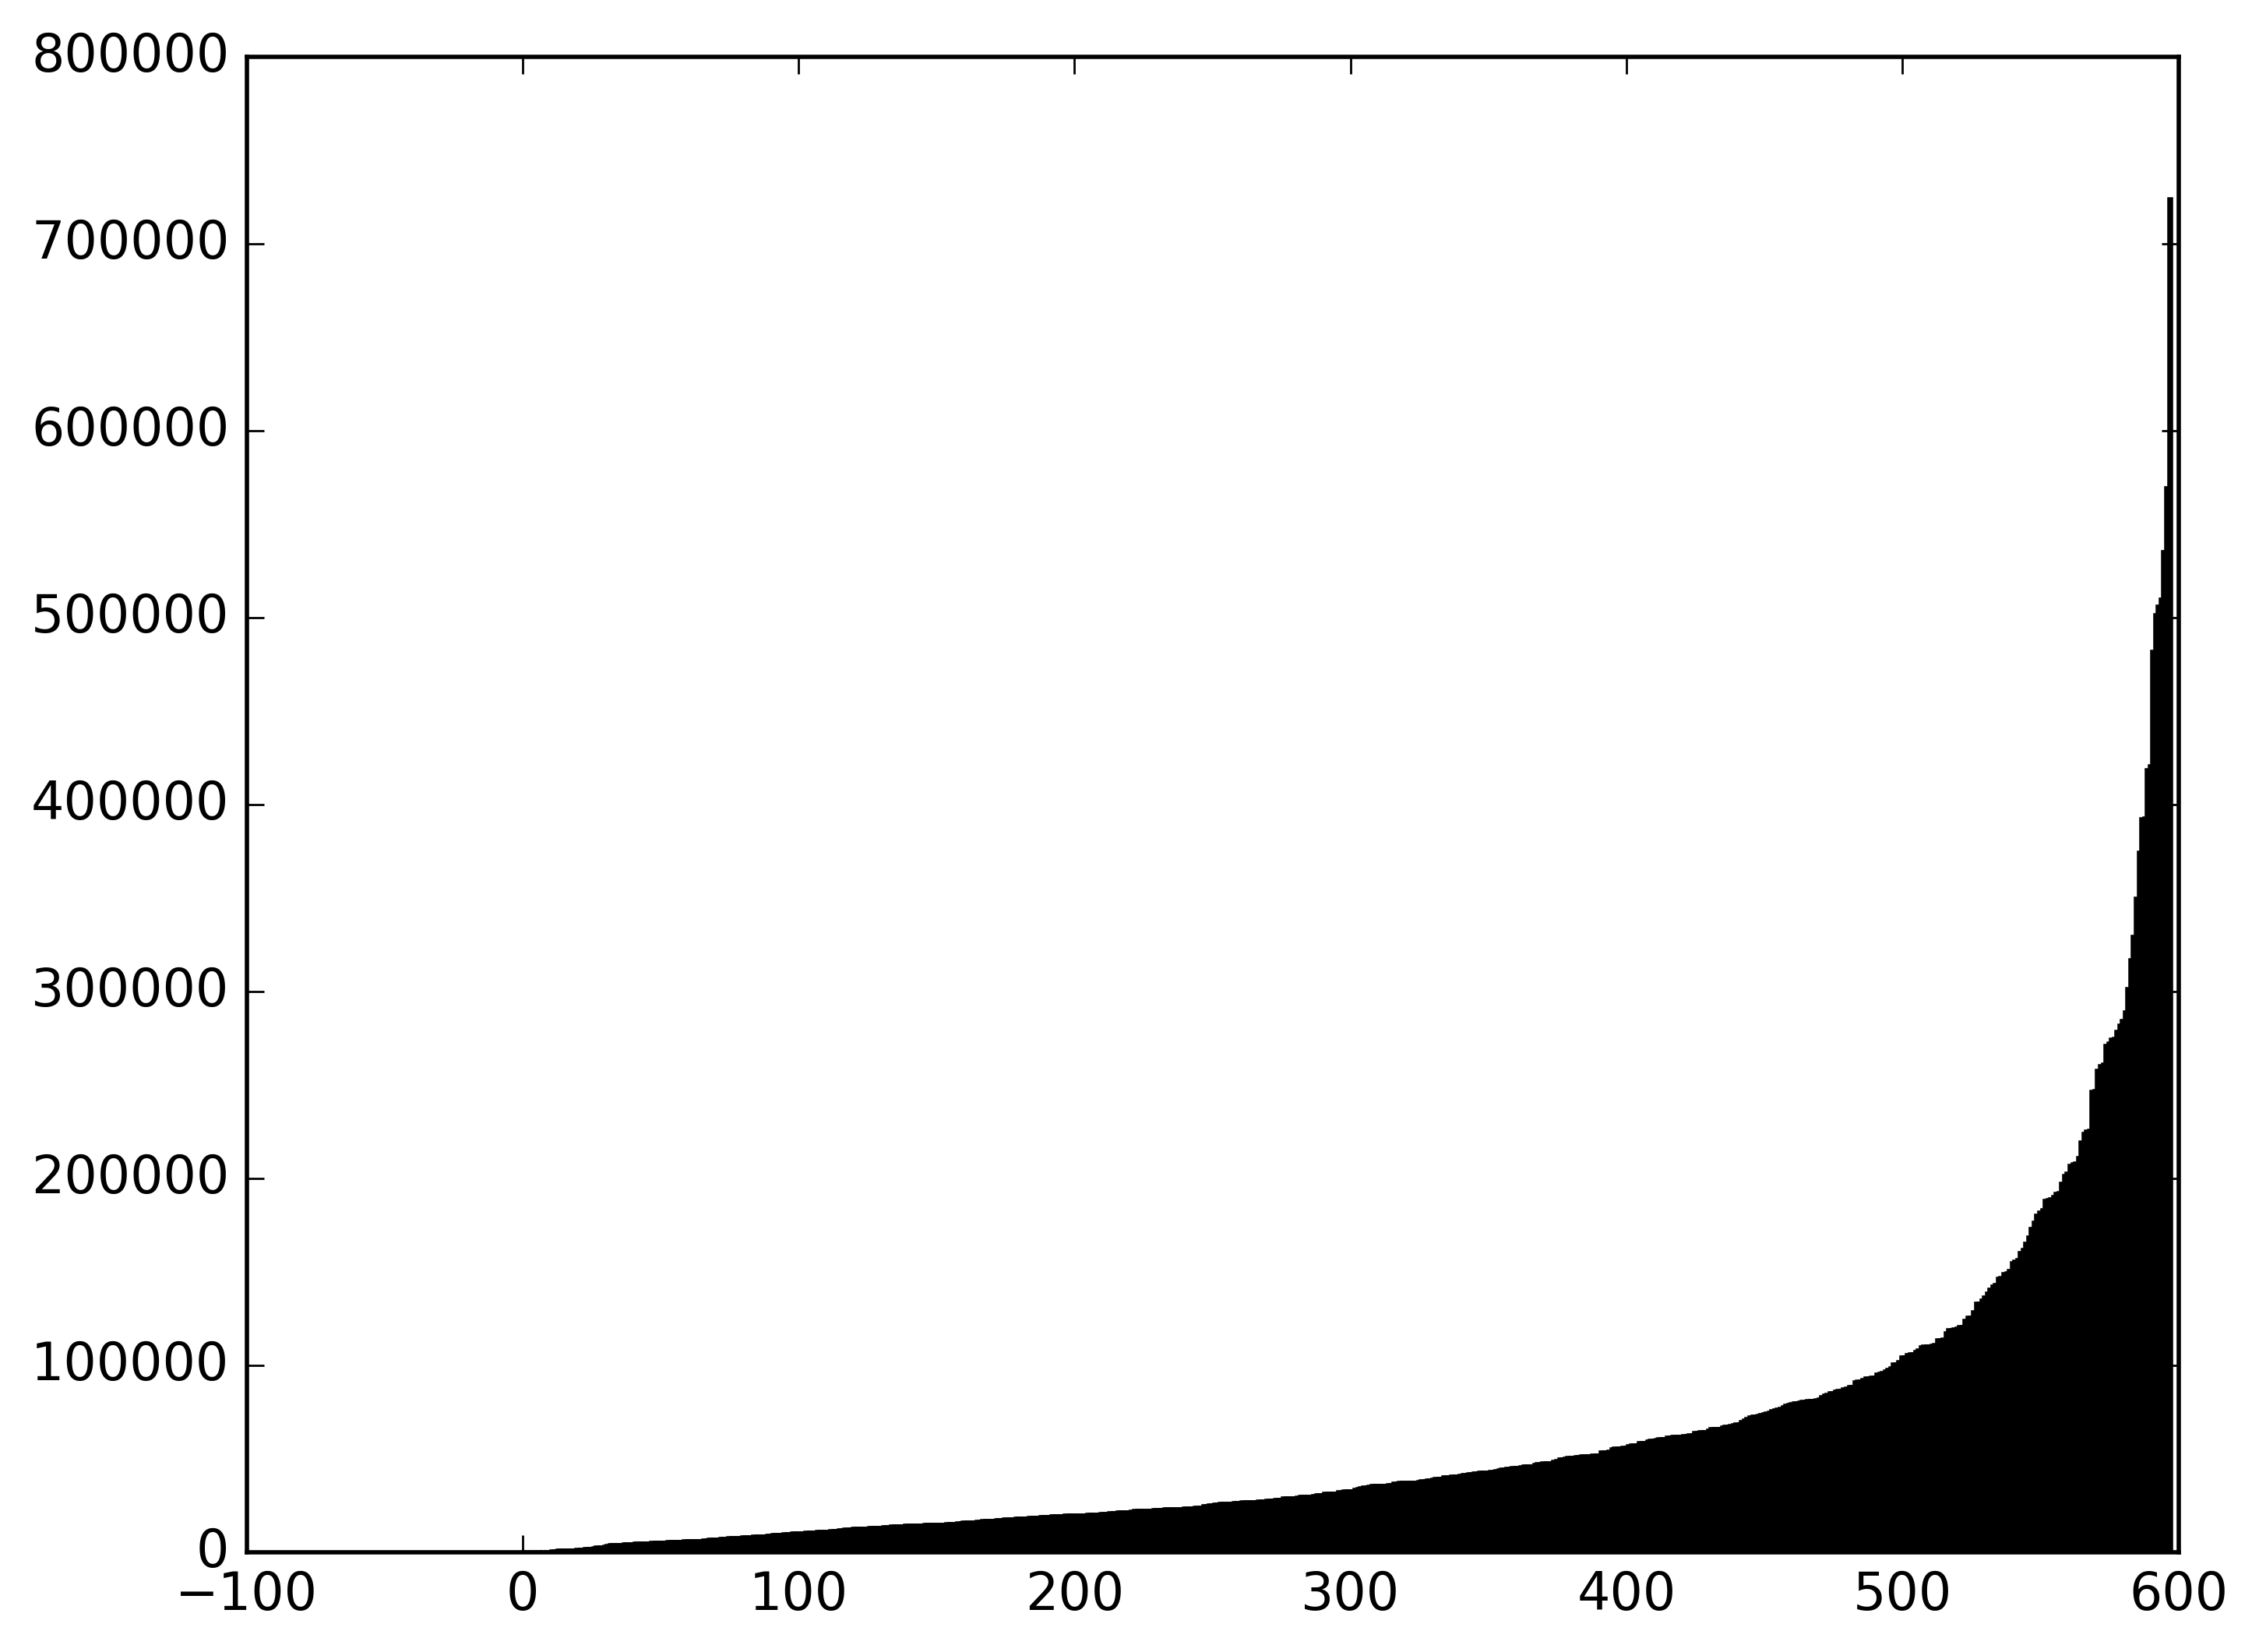

In [ ]:
# 막대그래프로 퇴근 시간대 승차인원 표출

import csv
import matplotlib.pyplot as plt


f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

result = [] # 퇴근시간인 오후 6~8시 승차 데이터 추출 -> row[32,34,36]

for row in data:
  row[4:]=map(int, row[4:])
  result.append(sum(row[32:35:2])) # 10,12,14를 추출

result.sort() # 데이터를 오름차순으로 정리

# 데이터 시각화
plt.figure(dpi=200)
plt.style.use('classic')
plt.bar(range(len(result)),result)
plt.show()

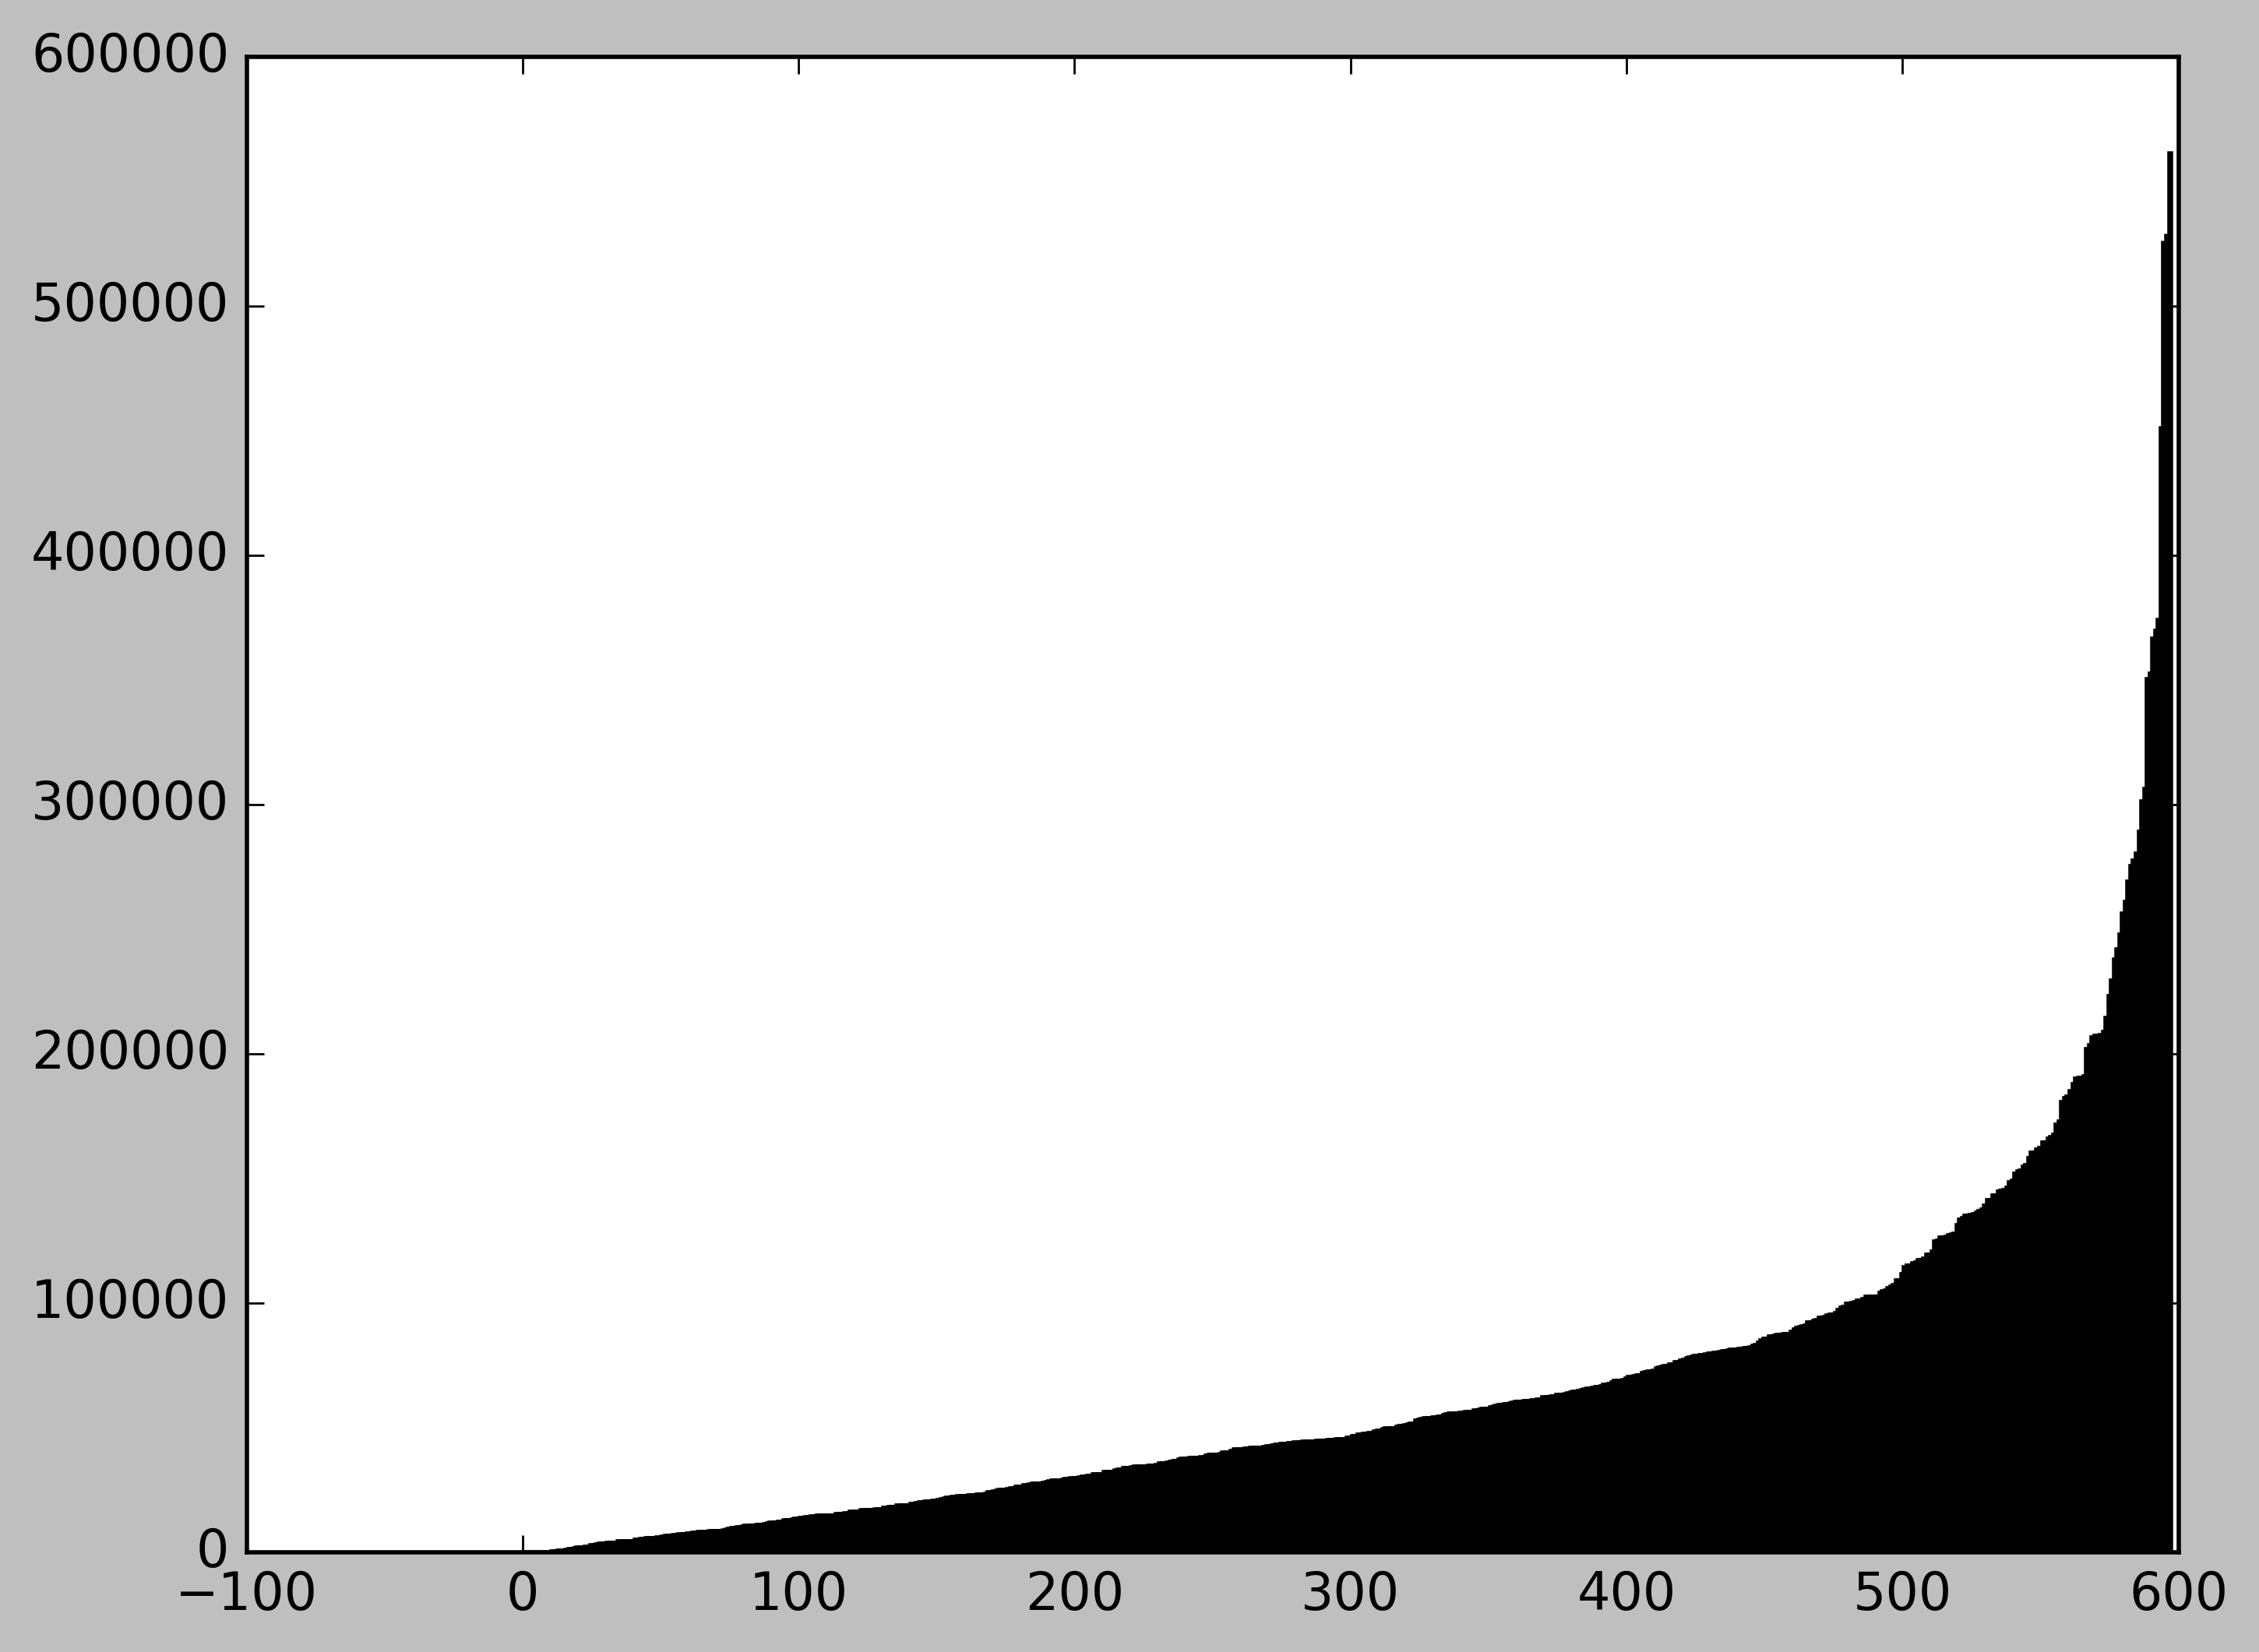

In [ ]:
# 막대그래프로 퇴근 시간대 승차인원 표출

import csv
import matplotlib.pyplot as plt


f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

result = [] # 퇴근시간인 오후 6~8시 하차 데이터 추출 -> row[33,35,37]

for row in data:
  row[4:]=map(int, row[4:])
  result.append(sum(row[33:36:2])) # 10,12,14를 추출

result.sort() # 데이터를 오름차순으로 정리

# 데이터 시각화
plt.figure(dpi=200)
plt.style.use('classic')
plt.bar(range(len(result)),result)
plt.show()

In [ ]:
import csv

f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

max=0
max_station=''

for row in data:
  row[4:]=map(int,row[4:])
  if sum(row[32:35:2]) > max:
    max=sum(row[32:35:2])
    max_station=row[3]+row[1]

print('서울지역의 퇴근시간 최대 승차역은 "%s"으로 승차인원은 %d명입니다'%(max_station,max))

서울지역의 퇴근시간 최대 승차역은 "강남2호선"으로 승차인원은 723636명입니다


In [ ]:
import csv

f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

max=0
max_station=''

for row in data:
  row[4:]=map(int,row[4:])
  if sum(row[33:36:2]) > max:
    max=sum(row[33:36:2])
    max_station=row[3]+row[1]

print('서울지역의 퇴근시간 최대 하차역은 "%s"으로 하차인원은 %d명입니다'%(max_station,max))

서울지역의 퇴근시간 최대 하차역은 "신림2호선"으로 하차인원은 561336명입니다


### 밤 11시에 사람들이 가장 많이 타는 역은 어디일까


승차 패턴 찾기<br> 
승차 시각이 1시간씩 늦어질 때 마다 인덱스 2씩 늘어남 <br> 승차 시작 시간의 인덱스 값 4 -> 4시부터 승차가 시작(첫차)<br> 
승차 시각(t) 와 승차 인원이 적힌 인덱스(i) 관계 분석 <br>
i = 4 + (t -4) * 2

In [ ]:
import csv

f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

max=0
max_station=''

t=int(input('새벽 4시부터 자정까지 중 몇 시의 승차인원이 가장 많은 역이 궁금하세요? : '))

for row in data:
  row[4:]=map(int,row[4:])
  a = row[4+(t-4)*2] # 입력 받은 시각의 승차 인원 값 추출

  if a > max:
    max = a
    max_station = row[3] + row[1]

print(max_station, max)

새벽 4시부터 자정까지 중 몇 시의 승차인원이 가장 많은 역이 궁금하세요? : 1
신방화9호선 1


시간대별 최대 승차역 이름 및 승차 인원 막대 그래프로 표현하기

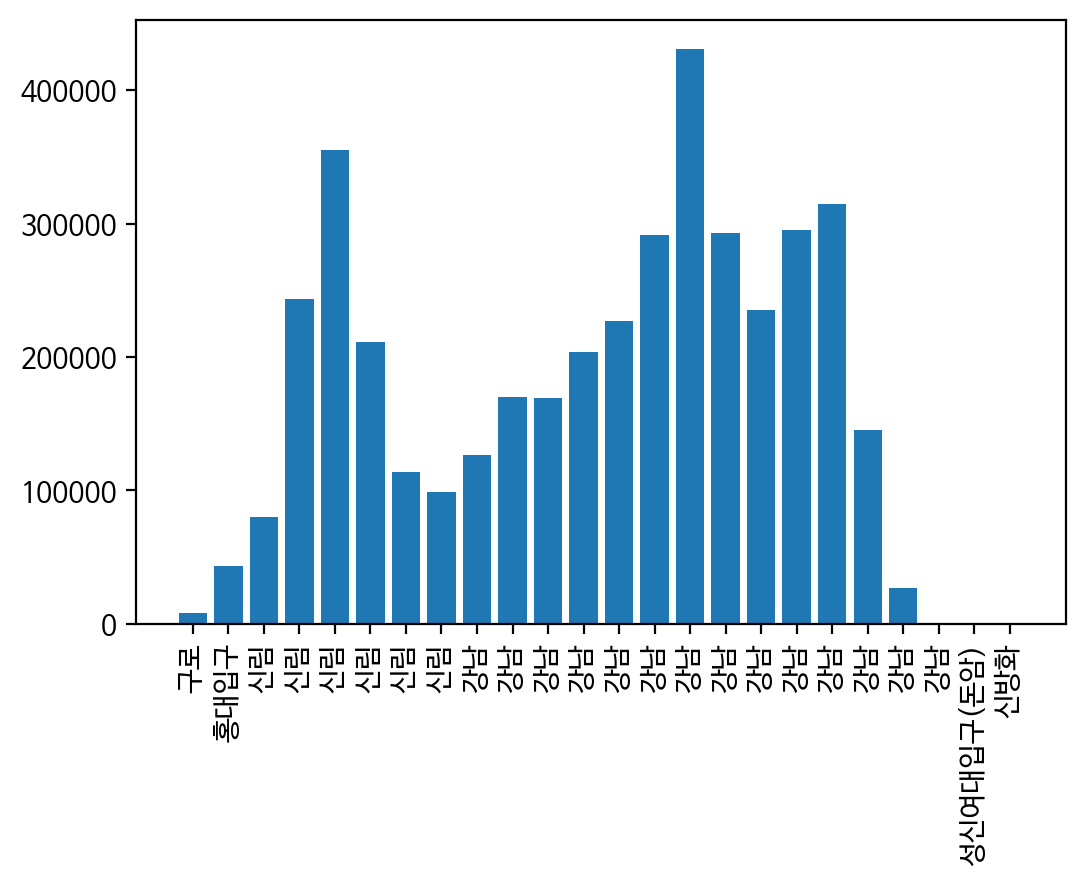

In [ ]:
import csv
import matplotlib.pyplot as plt


f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

max = [0] * 24
max_station = [''] * 24

for row in data:
  row[4:] = map(int,row[4:])
  for j in range(24):
    a= row[j*2 + 4] # 시간대별 패턴 i = j * 2 + 4 (j는 0 ~ 23까지)
    if a > max[j]:
      max[j] = a
      max_station[j] = row[3]

plt.rc('font', family = 'NanumBarunGothic')
plt.figure(dpi=200)
plt.bar(range(24),max)
plt.xticks(range(24), max_station, rotation=90)
plt.show()

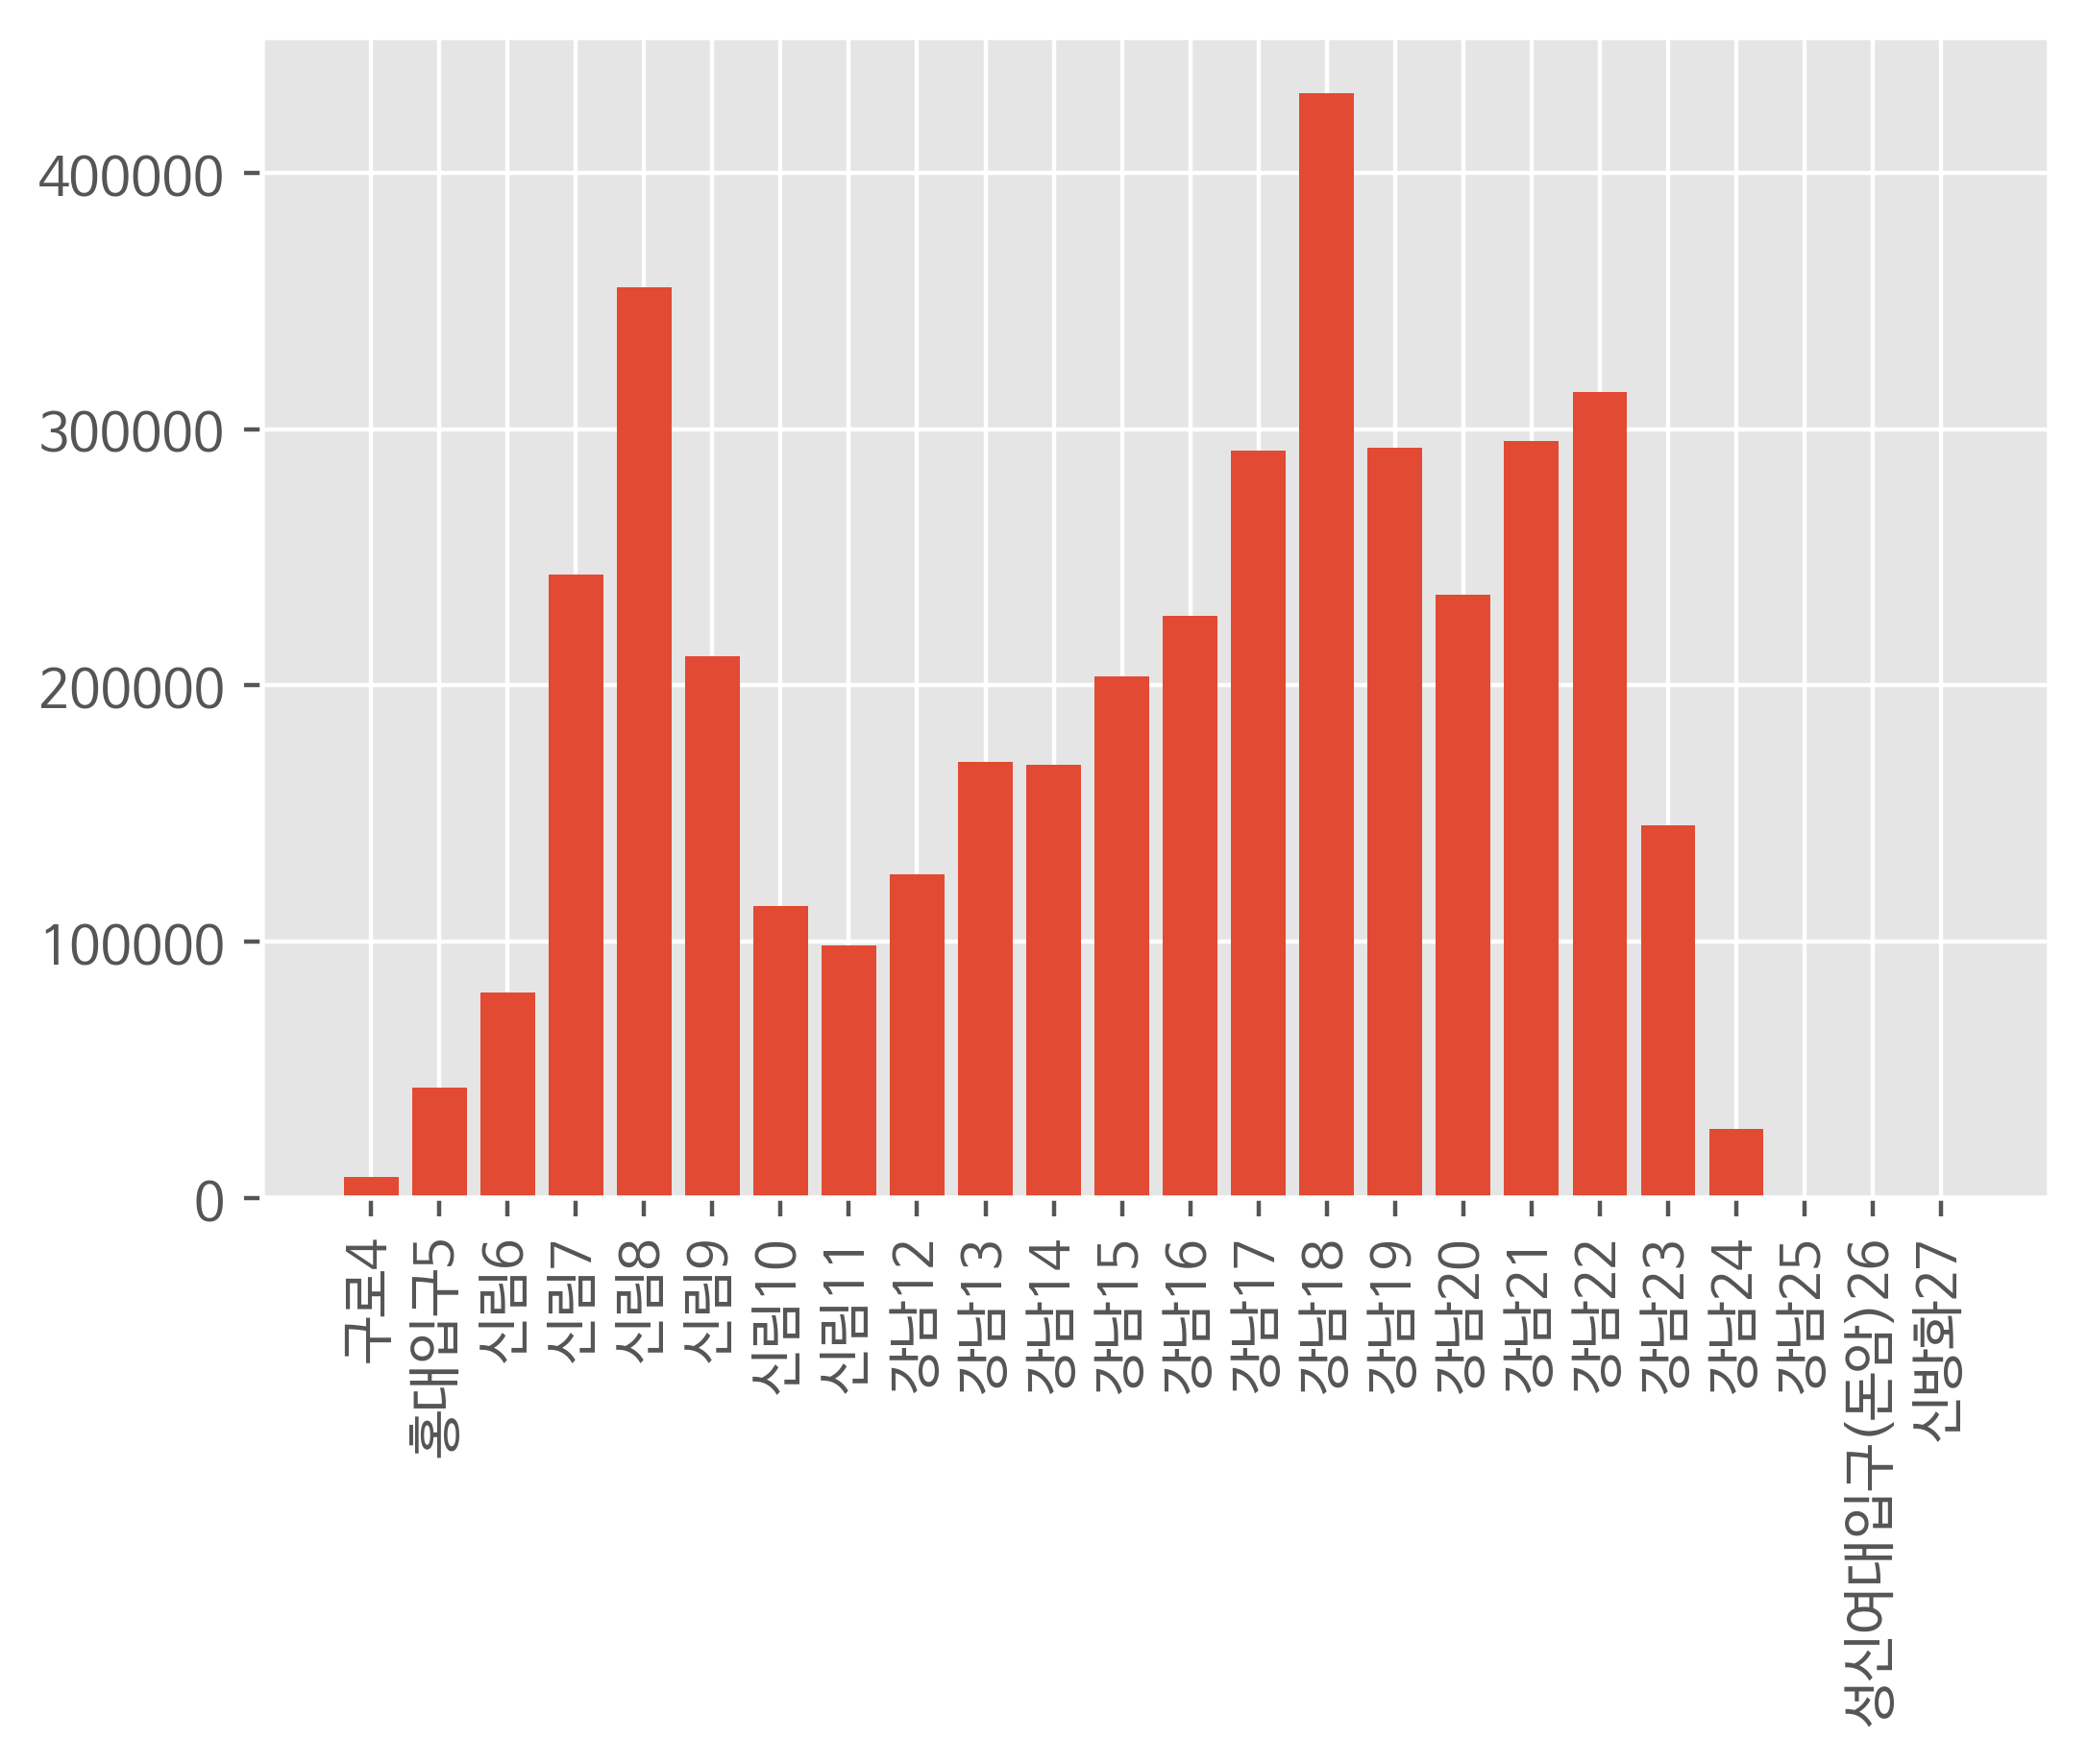

In [ ]:
import csv
import matplotlib.pyplot as plt


f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

max = [0] * 24
max_station = [''] * 24

for row in data:
  row[4:] = map(int,row[4:])
  for j in range(24):
    a= row[j*2 + 4] # 시간대별 패턴 i = j * 2 + 4 (j는 0 ~ 23까지)
    if a > max[j]:
      max[j] = a
      max_station[j] = row[3]+ str(j+4)

plt.rc('font', family = 'NanumBarunGothic')
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.bar(range(24),max)
plt.xticks(range(24), max_station, rotation=90)
plt.show()

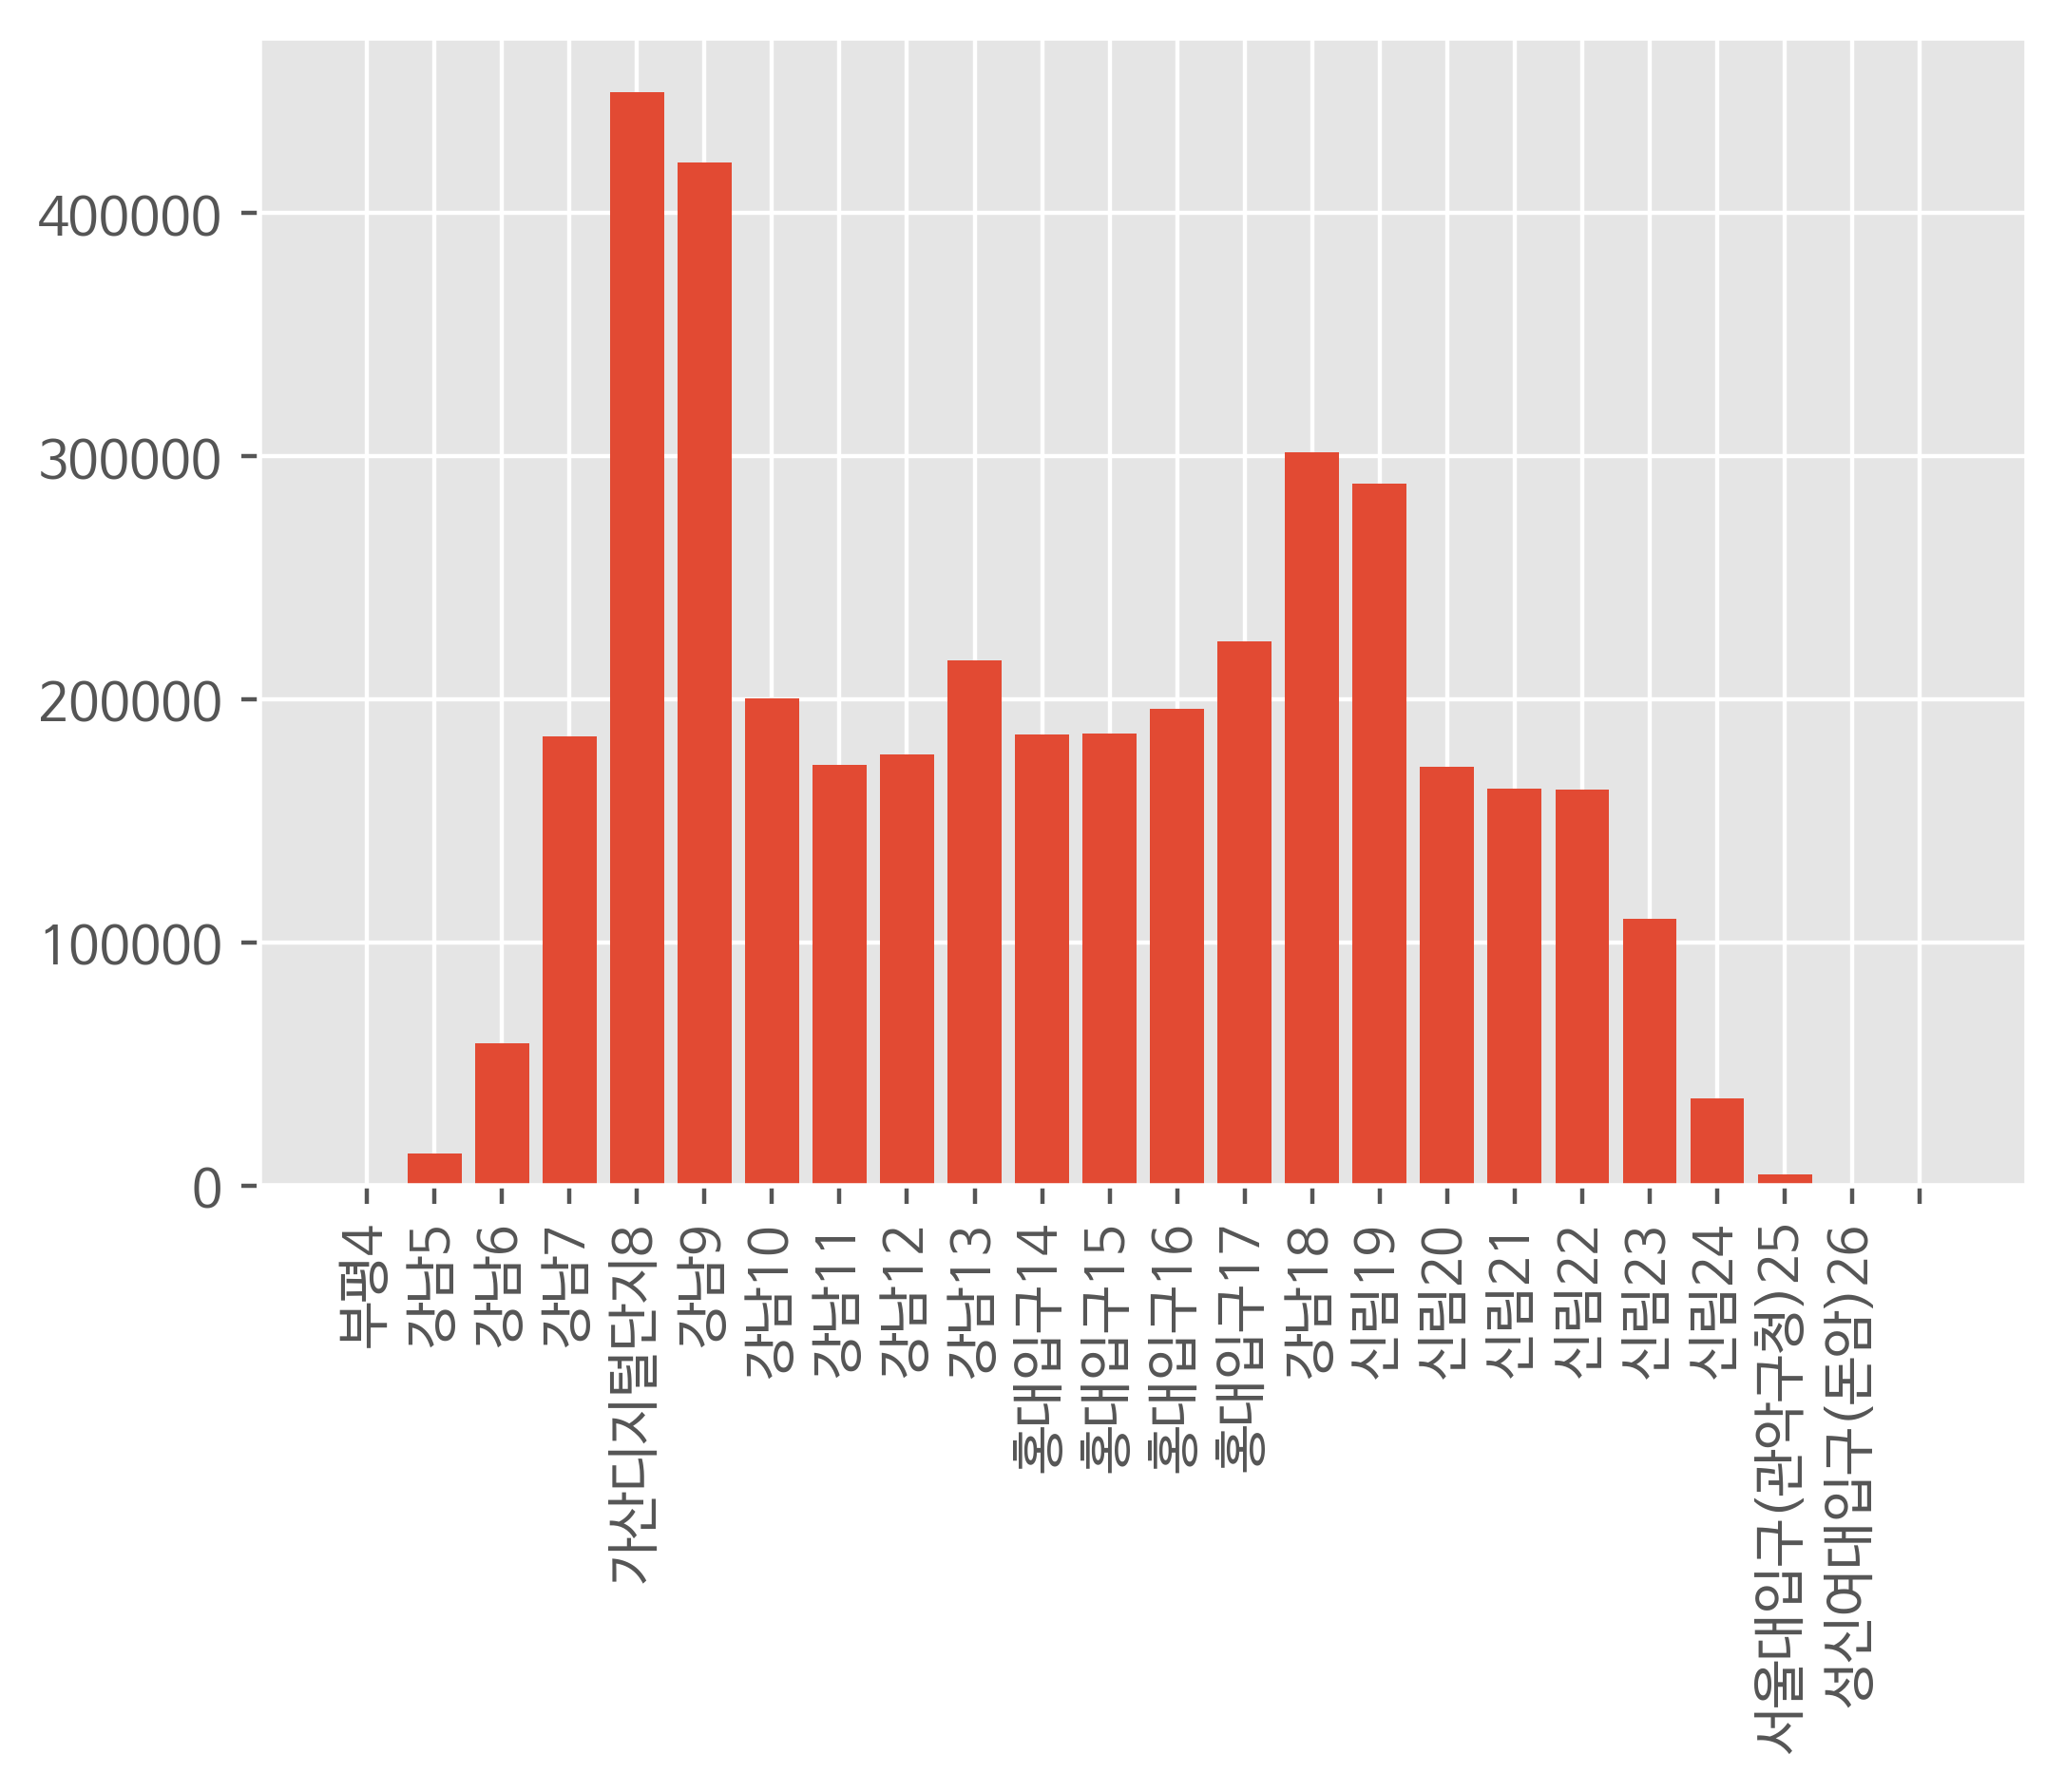

In [ ]:
# 하차

import csv
import matplotlib.pyplot as plt


f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

max = [0] * 24
max_station = [''] * 24

for row in data:
  row[4:] = map(int,row[4:])
  for j in range(24):
    a= row[j*2 + 5] # 시간대별 패턴 i = j * 2 + 4 (j는 0 ~ 23까지)
    if a > max[j]:
      max[j] = a
      max_station[j] = row[3]+ str(j+4)

plt.rc('font', family = 'NanumBarunGothic')
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.bar(range(24),max)
plt.xticks(range(24), max_station, rotation=90)
plt.show()

모든 지하철역에서 시간대별 승하차 인원을 모두 더하면

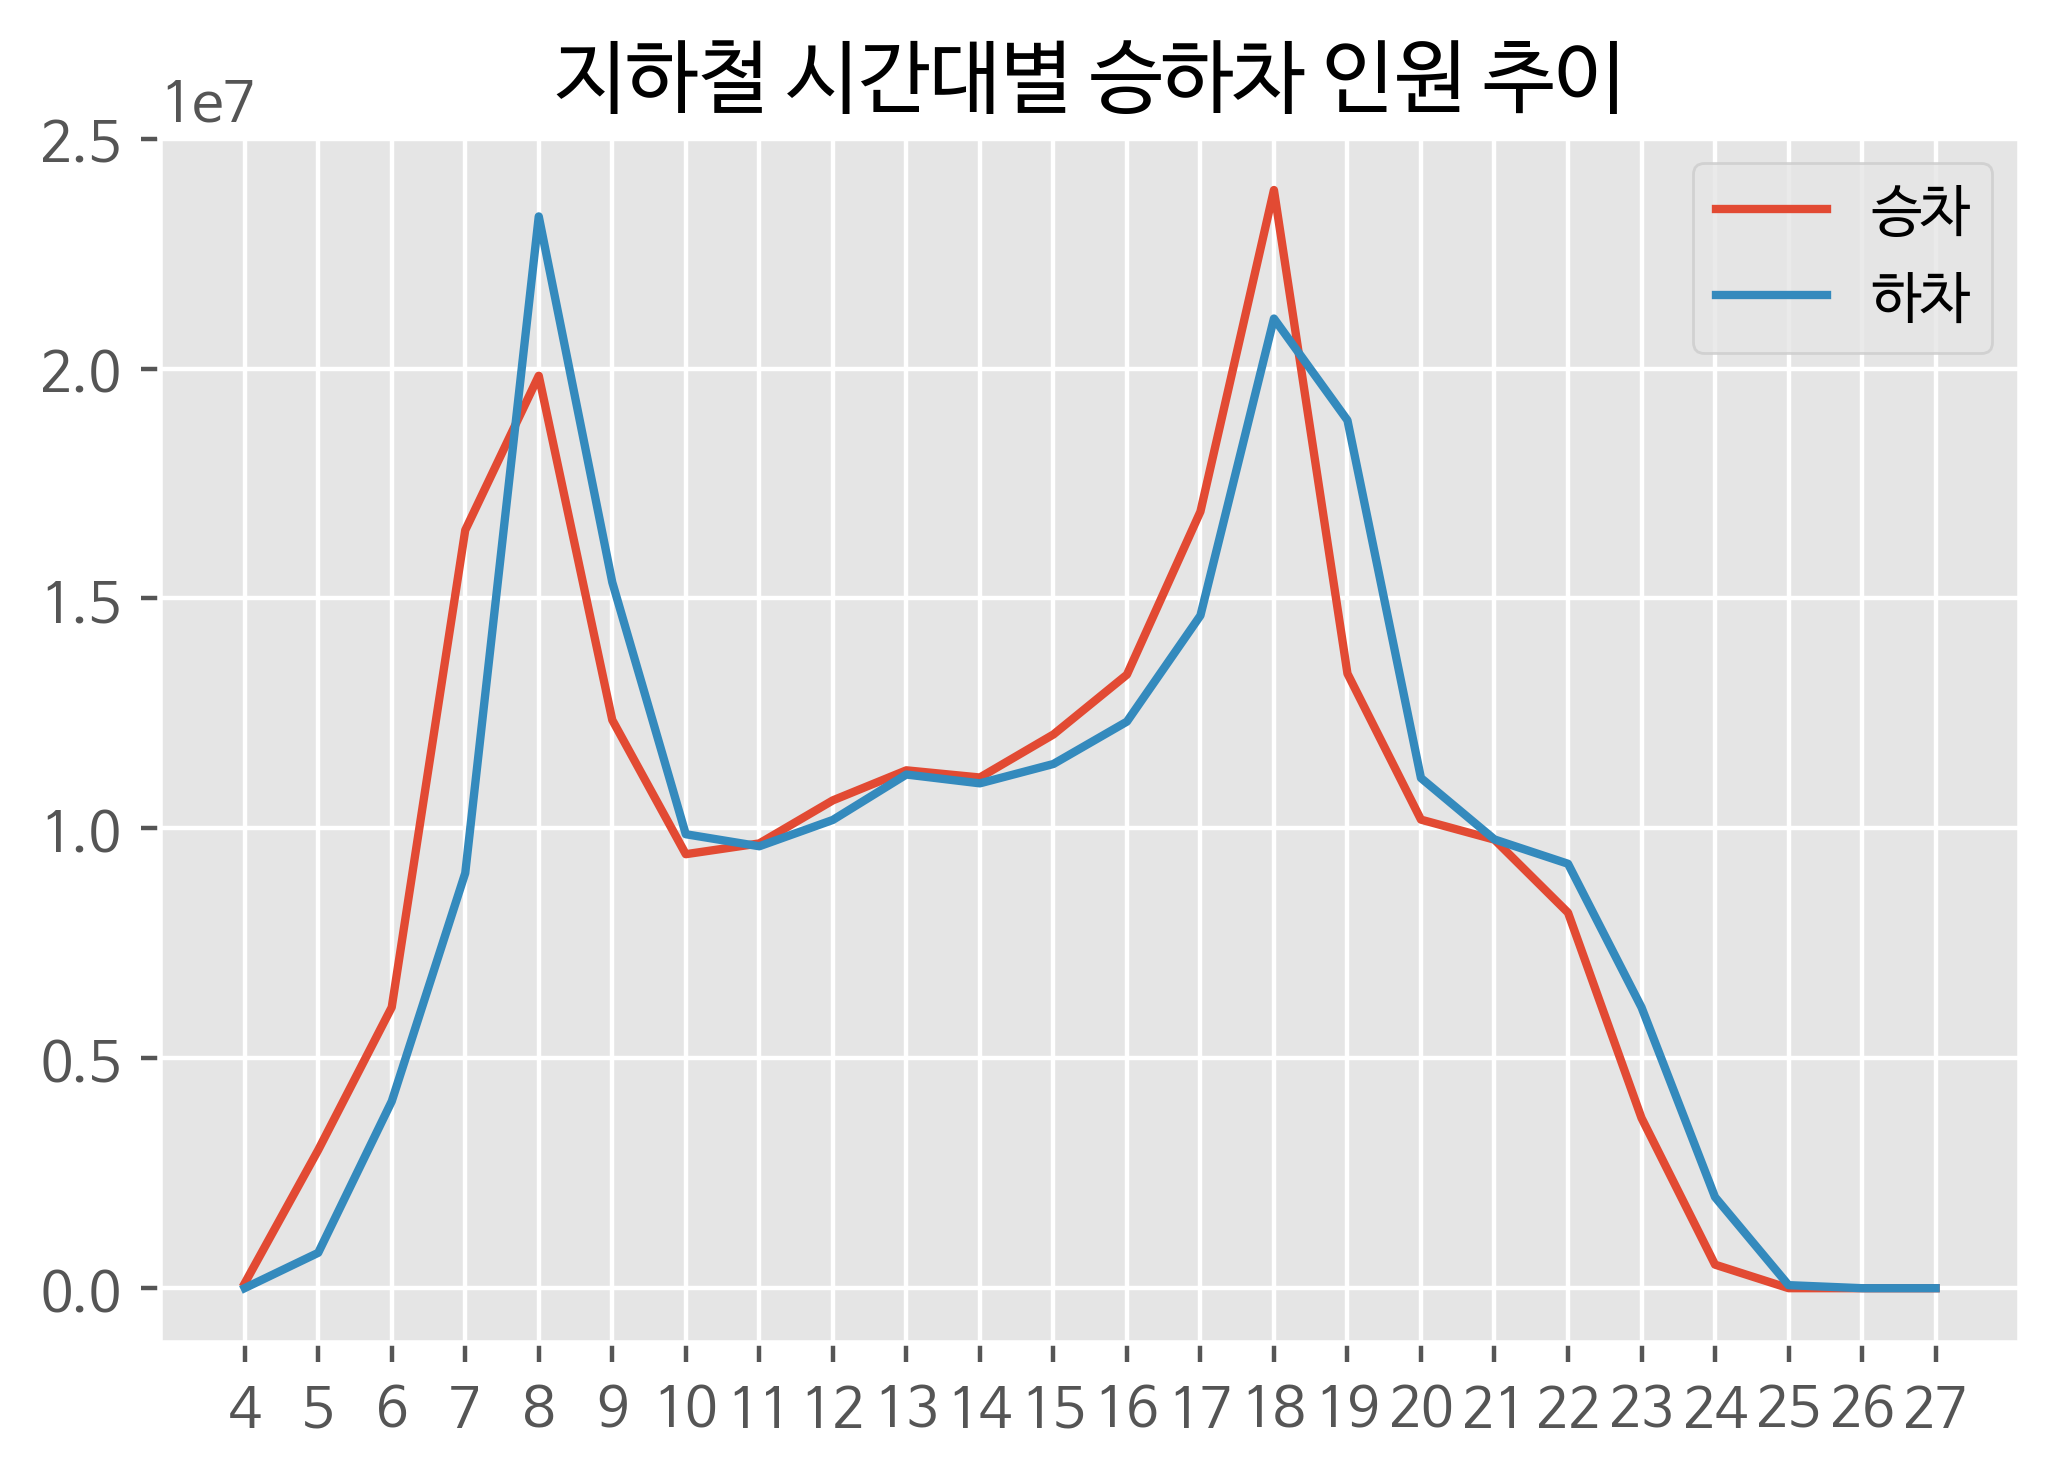

In [ ]:
import csv
import matplotlib.pyplot as plt


f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

s_in = [0] * 24
s_out = [0] * 24

for row in data:
  row[4:] = map(int,row[4:])
  for i in range(24):
    s_in[i] += row[4+i*2]
    s_out[i] += row[5+i*2]

plt.rc('font', family = 'NanumBarunGothic')
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label='승차')
plt.plot(s_out, label='하차')
plt.legend()
plt.xticks(range(24),range(4,28))
plt.show()